## Lecture 04 supporting notebook 01


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## DataFrames
- Indexing with loc, iloc, and []  
- DataFrames, Series, and Indices
- Conditional Selection
- Handy Utility Functions
- Baby Names (Extra)  

Accompanying notebooks can be found
[**here**]('https://uea.datascience.github.io/CMP5046B_Lecture_01/lab/index.html')

Tabular data is one of the most common data formats.  
- The DataFrame (df) class of the pandas library.
- What does the following code produce?
```python
    elections = pd.read_csv("elections.csv") #other ‘pd.read_...()’ available
```


In [4]:
elections = pd.read_csv('../data/elections.csv')
elections

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


## Interrogating a DataFrame (df)  

### Indexing with loc, iloc, []  

What will be the result of:  
```python
    elections.loc[0:4]
```

In [9]:
elections.loc[0:4]

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
5,1832,Henry Clay,National Republican,484205,loss,37.603628


#### Syntactic 'Sugar'  

In [6]:
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [7]:
elections.tail()

,Year,Candidate,Party,Popular vote,Result,%
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979
181,2020,Howard Hawkins,Green,405035,loss,0.255731


### Indexing with 'loc'  

loc also lets us specify the columns that we want as a **second** argument i.e. we can pass 2 arguements.  

In [8]:
elections.loc[0:4, "Year":"Party"]

,Year,Candidate,Party
0,1824,Andrew Jackson,Democratic-Republican
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican
4,1832,Andrew Jackson,Democratic


Fundamentally `loc` selects items by `label`.  
- The labels are the **bolded** text to the top and left of our dataframe.
- Row labels shown: **177, 178, 179, 180, 181**
- Column labels: Y**ear, Candidate, Party, Popular vote, Result, %**
```python
elections.loc[0:4]
```
*N.B. one argument passed*

In [ ]:
elections.loc[0:4]

Arguments to **loc** can be:  
- A list.  
- A slice (syntax is inclusive of the **right hand side** of the slice).  
- A single value.  


#### List  

In [ ]:
elections.loc[[87, 25, 179], ["Year", "Candidate", "Result"]]

#### Slice  

In [ ]:
elections.loc[[87, 25, 179], "Popular vote":"%"]

#### Single value  

In [ ]:
elections.loc[[87, 25, 179], "Popular vote"]

#### *colon*  
If you want all rows, but only some columns, you can use : for the left argument.  
- without the first colon the loc operator must assume that you are referring to rows.  

In [ ]:
elections.loc[:, ["Year", "Candidate", "Result"]]

### Indexing with 'iloc'  
Fundamentally iloc selects items by number (index).  
- Row numbers are 0 through 181 (in this example, same as labels!).
- Column numbers are 0 through 5.

In [ ]:
elections.iloc[177:182]

Arguments to iloc can be:  
- A list.
- A slice (syntax is **ex**clusive of the **right hand side** of the slice).
- A single value.  

In [ ]:
elections.iloc[[1, 2, 3], 0:3]

#### Single value  

In [ ]:
elections.iloc[[1, 2, 3], 1]  

Same as loc, if you want all rows, but only some columns, you can use : for the left argument.

In [ ]:
elections.iloc[:, 0:3]

#### Choose between 'loc' and 'iloc'  
When choosing between loc and iloc, you’ll usually choose loc.  
- Safer: If the order of columns gets shuffled in a public database, your code still works.
- Legible: Easier to understand what elections.loc[:, ["Year", "Candidate", "Result"]] means than elections.iloc[:, [0, 1, 4]]

iloc can still be useful.  
- Example: If you have a DataFrame of movie earnings sorted by earnings, can use iloc to get the median earnings for a given year (index into the middle).

#### [ ] - selection  
Selection operators:  
- loc selects items by label. First argument is rows, second argument is columns.  
- iloc selects items by number. First argument is rows, second argument is columns.  
- **[ ]** only takes one argument, which may be:  
  - A slice of row numbers.  
  - A list of column labels.  
  - A single column label.  

That is, **[ ]** is context sensitive.  

**[ ]** only takes one argument, which may be:   
- A **slice** of row numbers.  
- A list of column labels.  
- A single column label.  

#### Slice  

In [ ]:
elections[3:7]

#### List  

In [ ]:
elections[["Year", "Candidate", "Result"]].tail(5)

#### Single column label  

In [ ]:
elections["Candidate"].tail(5)

In [ ]:
wierd = pd.DataFrame({1:['topdog','botdog'], '1':['topcat','botcat']})
wierd

#### What will be the outcome for each of the following?  
```python
    weird[1]
    weird[“1”]
    weird[1:]
```

In [ ]:
wierd = pd.DataFrame({1:["topdog","botdog"], "1":["topcat","botcat"]})
wierd

In [ ]:
wierd[1] # Why is this the case?  

In [ ]:
wierd['1']

In [ ]:
wierd[1:]

### DataFrames, Series, and Indices  

In [ ]:
elections["Candidate"].tail(5)

In [ ]:
type(elections)

In [ ]:
type(elections['Candidate'])

#### There are three fundamental data structures in pandas:  
- Data Frame: 2D data tabular data.
- Series: 1D data. I usually think of it as columnar data.
- Index: A sequence of row/column labels.

In [ ]:
# Dataframe
elections.head()

In [ ]:
# Series
elections['Candidate'].head()

#### We can think of a Data Frame as a collection of Series that all share the same Index.  

#### Indices  
Not necessarily numbers:  
- can be non-numeric  

In [ ]:
mottos = pd.read_csv("../data/mottos.csv", index_col = "State")
mottos.loc["Alabama":"California"]

The row labels that constitute an index do not have to be unique.  
- Left: The index values are all unique and numeric, acting as a row number.
- Right: The index values are named and non-unique.  

In [ ]:
elections.iloc[:,1:5].head()

In [ ]:
elections1 = pd.read_csv("../data/elections.csv", index_col = "Year")
elections1.tail()

#### Series to DataFrame (df)  
Suppose we want our single column back as a DataFrame. Two approaches:  
- Use Series.to_frame().
- Provide a list containing the single column of interest.
    - Looks like double braces! But this is just a list provided to the [] operator.


In [ ]:
elections["Candidate"].tail(5)

In [ ]:
elections["Candidate"].tail(5).to_frame()

In [ ]:
elections[["Candidate"]].tail(5)

#### Retrieving Row and Column Labels  
- For row labels, use DataFrame.index
- For column labels, use DataFrame.columns  

In [ ]:
mottos.index

In [ ]:
mottos.columns

### Conditional Selection - Boolean Array Input for .loc and [ ]  
We learned to extract data according to its integer position (.iloc) or its label (.loc).  
What if we want to extract rows that satisfy a given condition?  
- .loc and [ ]  also accept boolean arrays as input.
- Rows corresponding to True are extracted; rows corresponding to False are not.

In [ ]:
babynames = pd.read_csv('../data/baby_names.csv')
babynames_first_10_rows = babynames.loc[:9, :]
babynames_first_10_rows

In [ ]:
# Selection
babynames_first_10_rows[[True, False, True, False, True, False, True, False, True, False]]

In [ ]:
# .loc()
babynames_first_10_rows.loc[[True, False, True, False, True, False, True, False, True, False], :]

In [ ]:
logical_operator = (babynames["Sex"] == "F")
logical_operator

#### Boolean Operator  

In [ ]:
#### '|' (pipe), "OR", 'less than'  
babynames[(babynames["Sex"] == "F") | (babynames["Year"] < 2000)]

#### & and | are examples of bitwise operators. They allow us to apply multiple logical conditions.  
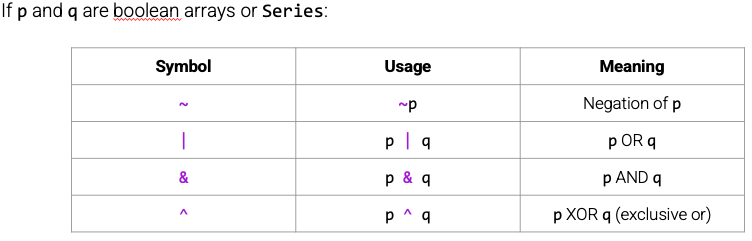


In [ ]:
# Verbose
babynames[(babynames["Name"] == "Bella") | (babynames["Name"] == "Alex") |(babynames["Name"] == "Narges") | (babynames["Name"] == "Lisa")]

#### Alternatives  
for example:  
- .isin
- .str.startswith
- .groupby.filter

In [ ]:
names = ["Bella", "Alex", "Narges", "Lisa"]
babynames[babynames["Name"].isin(names)]

In [ ]:
babynames[babynames["Name"].str.startswith("N")]

### Adding / removing columns  
Adding:  
- Use [ ] to reference the desired new column.

In [ ]:
# Create a Series of the length of each name
babyname_lengths = babynames["Name"].str.len()

# Add a column named "name_lengths" that 
# includes the length of each name
babynames["name_lengths"] = babyname_lengths
babynames

#### Modifying a column is very similar to adding a column.  
Use [ ] to reference the existing column.  
- Assign this column to a new Series or array of the appropriate length.  

In [ ]:
# Modify the "name_lengths" column to be one less than its original value
babynames["name_lengths"] = babynames["name_lengths"]-1
babynames

#### Rename a column using the (creatively named) .rename() method.  
- .rename() takes in a dictionary that maps old column names to their new ones.  

In [ ]:
# Rename "name_lengths" to "Length"
babynames = babynames.rename(columns={"name_lengths":"Length"})
babynames.head()

#### Remove columns using the (also creatively named) .drop method.  
- The .drop() method assumes you're dropping a row by default. Use axis = "columns" or axis = '1' to drop a column instead.

In [ ]:
babynames.drop("Length", axis = "columns") #or axis = 1

In [ ]:
babynames.head()

In [ ]:
babynames = babynames.drop("Length", axis = "columns") #or axis = 1
babynames.head()

### Utility Functions (see lecture slides)  
#### Sample  
To sample a random selection of rows from a DataFrame, we use the .sample() method.  
- By default, it is without replacement. Use replace=True for replacement.
- Naturally, can be chained with other methods and operators (iloc, etc).

#### Built-In pandas  Methods  
In addition to its rich syntax for indexing and support for other libraries (NumPy, native Python functions), pandas provides an enormous number of useful utility functions:  
- size/shape
- describe
- sample
- value_counts
- unique
- sort_values

The pandas library is rich in utility functions (we could spend the entire summer talking about them)! We encourage you to explore as you complete your assignments by Googling and reading documentation, just as data scientists do.  

In the follwoing cells w will look at the built in  'sample' methods, further examples an be found in the lecture slides available on Blackboard.  

In [ ]:
babynames.sample()

In [ ]:
babynames.sample(5).iloc[:, 2:]

In [ ]:
babynames[babynames["Year"] == 2000].sample(4, replace=True).iloc[:, 2:]

#### Sort values  
The DataFrame.sort_values and Series.sort_values methods sort a DataFrame (or Series).  
- Series.sort_values( ) will automatically sort all values in the Series.
- DataFrame.sort_values(column_name) must specify the name of the column to be used for sorting.  

In [ ]:
babynames["Name"].sort_values()

The DataFrame.sort_values and Series.sort_values methods sort a DataFrame (or Series).  
- Series.sort_values( ) will automatically sort all values in the Series.
- DataFrame.sort_values(column_name) must specify the name of the column to be used for sorting.  

In [ ]:
babynames.sort_values(by = "Count", ascending=False) # default value for order is 'ascending'

### Grouping  
Why 'group' data?  
- Group together rows that fall under the same category.
    - For example, group together all rows from the same year.
- Perform an operation that aggregates across all rows in the category.
    - For example, sum up the total number of babies born in that year.

Grouping is a powerful tool to 1) perform large operations, all at once and 2) summarize trends in a dataset.  

LS part 2.39

#### Find the baby name with sex "F" that has fallen in popularity the most.  

In [ ]:
f_babynames = babynames[babynames["Sex"] == "F"]
f_babynames = f_babynames.sort_values(["Year"])
jenn_counts_series = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"]
jenn_counts_series

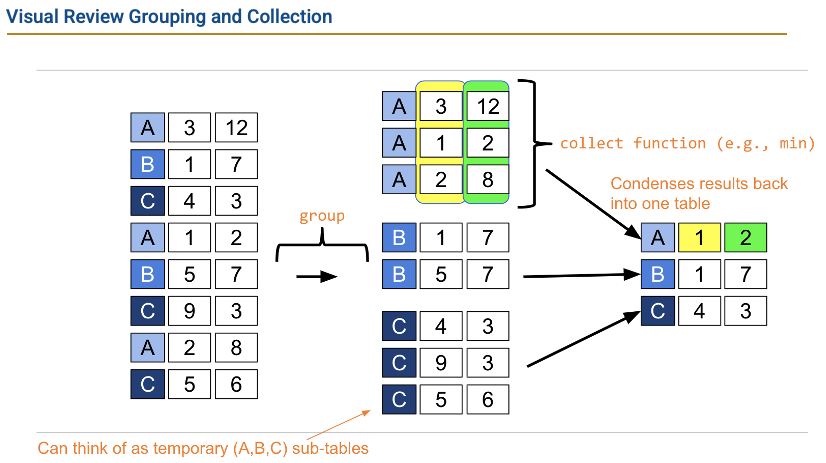

#### A .groupby() operation involves some combination of splitting the object, applying a function, and combining the results.  
- Calling .groupby() generates DataFrameGroupBy objects → "mini" sub-DataFrames
- Each subframe contains all rows that correspond to the same group (here, a particular year)

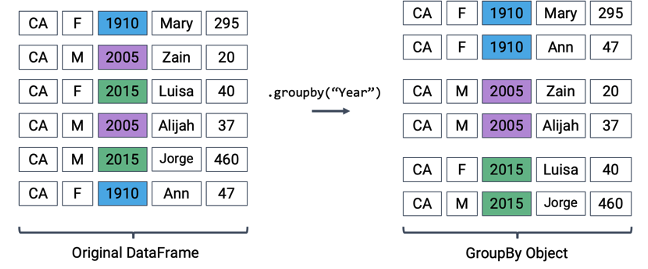

#### .grouping() .agg()  
We cannot work directly with DataFrameGroupBy objects! The diagram below is to help understand what goes on conceptually – in reality, we can't "see" the result of calling .groupby.  
Instead, we transform a DataFrameGroupBy object back into a DataFrame using .agg  
- .agg is how we apply an aggregation operation to the data.
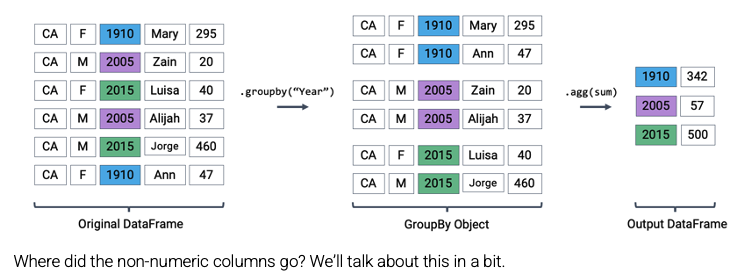

Example: dataframe.groupby(column_name).agg(aggregation_function)  
- dataframe.groupby(column_name).agg(aggregation_function)

In [ ]:
babynames[["Year", "Count"]].groupby("Year").agg(sum) # computes the total number of babies born in each year.

#### Aggragation functions  
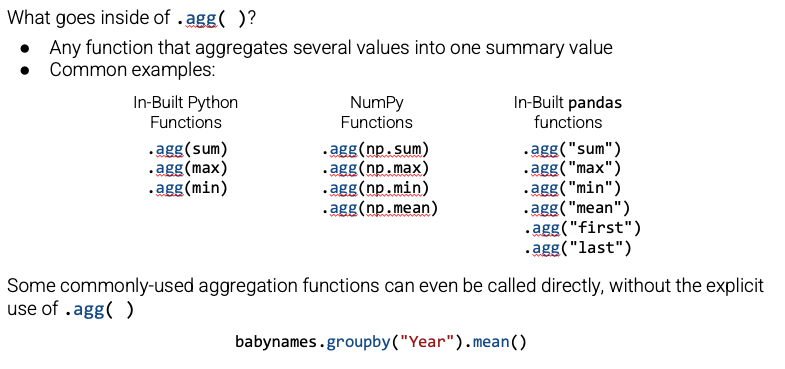  

### Join df's  
Suppose want to know the popularity of presidential candidate's names in year 2022.  
- Example: Dwight Eisenhower's name Dwight has dropped in popularity, with only 5 babies born with this name in for example California, in 2022.  

To solve this problem, we’ll have to join tables.  

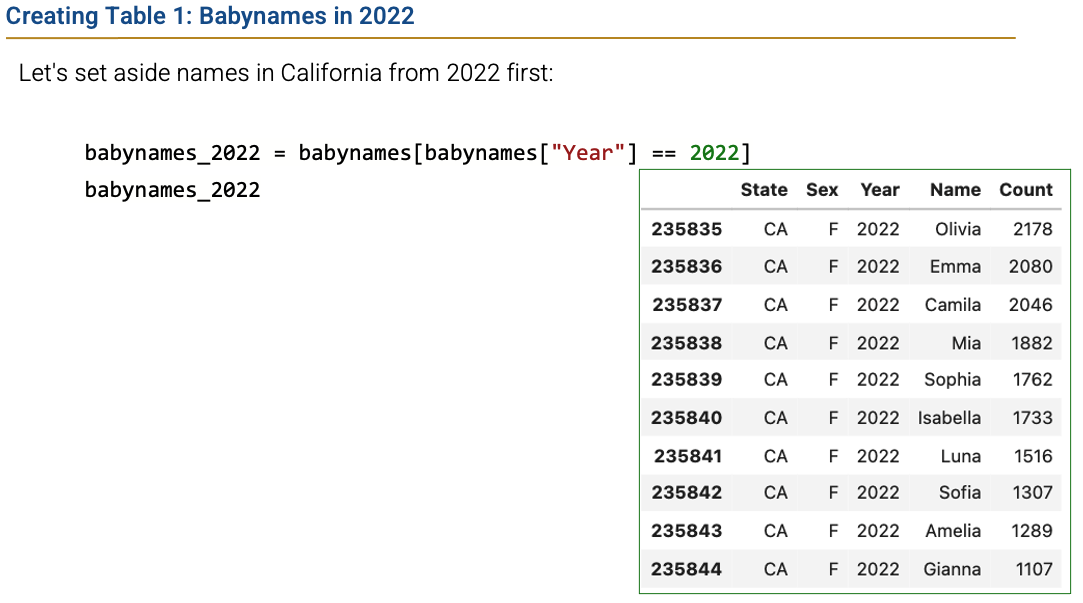

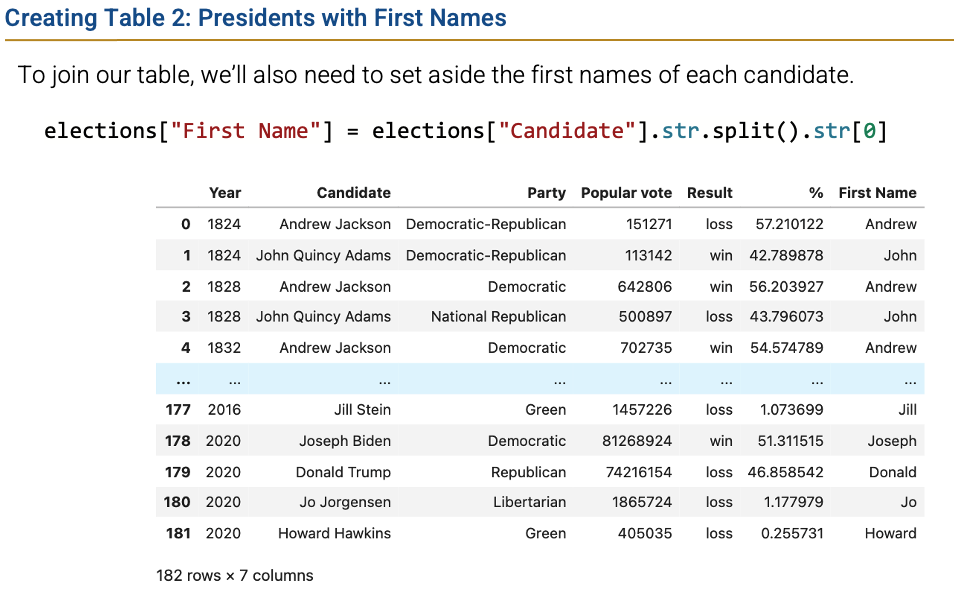

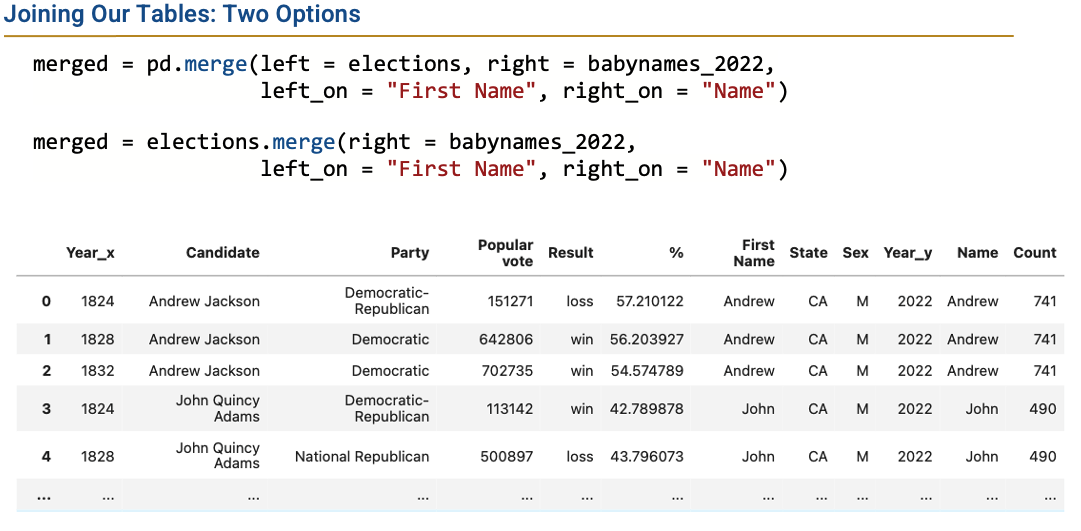